## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#sanity check
#print(mouse_metadata)
#print(study_results)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

#sanity check
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
len(merged_data)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates("Mouse ID", keep = "last")

#sorting by Drug Regimen
sorted_clean_df = clean_df.sort_values(by = "Drug Regimen")

#sanity check
#sorted_clean_df

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

249

In [38]:
#visualize a df grouped by regimen
organized_no_count_df = clean_df.groupby("Drug Regimen")

organized_w_count_df = organized_no_count_df.count()

#sanity check
#organized_w_count_df

#checking the types
#organized_w_count_df.dtypes

In [8]:
#pulling the drug regimen names
drug_regimen = list(organized_w_count_df.index.values)

#sanity check
#drug_regimen

In [33]:
#df's with the seperate necessary calculations
mean_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#sanity check
#print(mean_df)

#sanity check
#print(median_df)

#sanity check
#print(var_df)

#sanity check
#print(std_df)

#sanity check
#print(sem_df)

## Summary Statistics

In [36]:
#merge the calculations
first_merge_df = pd.merge(mean_df, median_df, on="Drug Regimen")

#adding variance to the df
second_merge_df = pd.merge(first_merge_df, var_df, on='Drug Regimen')

#renaming the columns to reflect the claculations we have so far
second_merge_df = second_merge_df.rename(columns={"Tumor Volume (mm3)_x":"Avg. Tumor Vol.","Tumor Volume (mm3)_y":"Median Tumor Vol.","Tumor Volume (mm3)":"Variance"})

#sanity check
#second_merge_df

third_merge_df = pd.merge(second_merge_df, std_df, on="Drug Regimen")

#rename the std column
third_merge_df = third_merge_df.rename(columns={"Tumor Volume (mm3)":"Standard Dev."})

#sanity check
#third_merge_df

complete_stats_df = pd.merge(third_merge_df, sem_df, on="Drug Regimen")

complete_stats_df = complete_stats_df.rename(columns={"Tumor Volume (mm3)":"Standard Error"})

complete_stats_df

,Avg. Tumor Vol.,Median Tumor Vol.,Variance,Standard Dev.,Standard Error
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

In [51]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

barplot_data_df = merged_data.groupby("Drug Regimen").count()
barplot_data_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


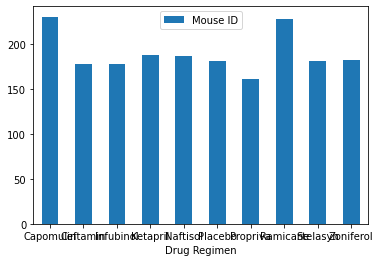

In [53]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

barplot_data_df.plot.bar(y='Mouse ID', rot=0)



## Pie Plots

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
